In [1]:
import os
import platform
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import pandas as pd
from typing import Optional
import logging as lg
import numpy as np

myLogger = lg.getLogger()
myLogger.setLevel(lg.INFO)

# set plt attrs
def set_plt() -> None:
    ## set plt minus font
    plt.rcParams["axes.unicode_minus"] = False
    
    ## set font
    system_name: str = platform.system()
    if system_name == "Windows":
        # Windows
        plt.rc("font", family="Malgun Gothic")
    elif system_name == "Darwin":
        # Mac
        plt.rc("font", family="AppleGothic")
    elif system_name == "Linux":
        # Linux
        path = "/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf"
        font_name = font_manager.FontProperties(fname=path, size=12)
        plt.rc("font", family=font_name)
    else:
        print("Not support")


# get all data from data folder
def get_data() -> dict[str, pd.DataFrame]:
    cur_path: str = os.getcwd()
    names: list[str] = os.listdir(os.path.join(cur_path, "files"))

    names = list(filter(lambda x:x.split('.')[1] in ['csv','xls'],names))
    data: Optional[dict[str, pd.DataFrame]] = {}
    
    for f_n in names:
        abs_path: str = os.path.join(cur_path, "files\\{}".format(f_n))
        try:
            if f_n.endswith(".csv"):
                data[f_n] = pd.read_csv(abs_path, encoding="euc-kr")
            elif f_n.endswith(".xlsx") or f_n.endswith("xls"):
                data[f_n] = pd.read_excel(abs_path)
            else:
                data["None"] = pd.DataFrame({})
        except UnicodeDecodeError as ue:
            # error occur because of encoding method
            myLogger.error("Warning encoding \"euc-kr\" failed at : {}".format(abs_path))
            data[f_n] = pd.read_csv(abs_path)

    return data


In [2]:
"""
df['파일이름'] 하면 해당 파일의 DataFrame을 가져옵니다.
"""
set_plt()
dfs:dict[str,pd.DataFrame] = get_data()

In [3]:
# 무연고 사망자 중 연고자 여부
# 연고자가 거부 및 기피하는 비중이 늘어나고 있으며, 이는 1인가구가 늘어나고 1인 노인가구가 늘어남에 따라 
# 이에 대한 심각성이 가중되고 있음
df = dfs['무연고_사망자_중_연고자_여부.csv'].copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   연도                   2 non-null      int64
 1   연고자 없음               2 non-null      int64
 2   연고자 알 수 없음           2 non-null      int64
 3   연고자 있으나 시신 인수 거부·기피  2 non-null      int64
 4   합계                   2 non-null      int64
dtypes: int64(5)
memory usage: 208.0 bytes


In [5]:
df.describe()

,연도,연고자 없음,연고자 알 수 없음,연고자 있으나 시신 인수 거부·기피,합계
count,2.000000,2.00000,2.000000,2.000000,2.000000
mean,2019.500000,618.50000,212.500000,1970.500000,2801.500000
std,0.707107,21.92031,57.275649,170.412734,205.768073
min,2019.000000,603.00000,172.000000,1850.000000,2656.000000
25%,2019.250000,610.75000,192.250000,1910.250000,2728.750000
50%,2019.500000,618.50000,212.500000,1970.500000,2801.500000
75%,2019.750000,626.25000,232.750000,2030.750000,2874.250000
max,2020.000000,634.00000,253.000000,2091.000000,2947.000000


In [6]:
df.head(3)

,연도,연고자 없음,연고자 알 수 없음,연고자 있으나 시신 인수 거부·기피,합계
0,2019,634,172,1850,2656
1,2020,603,253,2091,2947


In [7]:
# index = df.index.copy().tolist()
# cols = df.columns.copy().tolist()
# cols[3] = cols[3].replace('연고자 있으나 ','')

# df.columns = cols.copy()

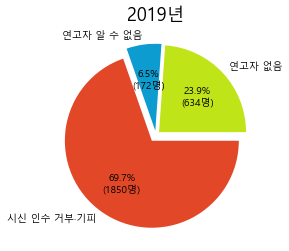

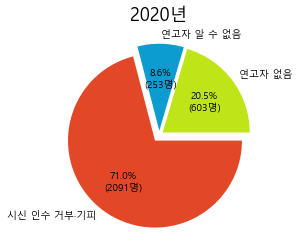

In [8]:
# 무연고 사망자 중 연고자 여부
# 연고자가 거부 및 기피하는 비중이 늘어나고 있으며, 이는 1인가구가 늘어나고 1인 노인가구가 늘어남에 따라 
# 이에 대한 심각성이 가중되고 있음
index = df.index.copy().tolist()
cols = df.columns.copy().tolist()
cols[3] = cols[3].replace('연고자 있으나 ','')

df.columns = cols.copy()

# function for autopct
def allValues(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d}명)".format(pct, absolute)
labels = cols.copy()[:-1]
for i in index:
    datum = df.loc[i,labels].copy().to_numpy()
    
    explode = np.array([0.05]*(datum[1:].size))
    explode[np.where(datum[1:] == datum[1:].max())] = 0.08
    
    plt.pie(datum[1:],labels=labels[1:],autopct=lambda pct: allValues(pct, datum[1:]),explode=explode,colors=['#BFE417','#0D9CCF','#E24827'])
    plt.title('{}년'.format(datum[0]),fontdict={'fontsize':18,'color':'black'})

    plt.savefig(''.join(['./연고자여부/',str(datum[0])+'년 연고자여부','.png']))
    plt.show()
    plt.close()    
    

In [9]:
df:pd.DataFrame = dfs['월_분기_연간_인구동향_출생_사망_혼인_이혼.csv'].copy()

cols = df.columns.copy()
cols2 = df.iloc[0,:].apply(lambda x:x.replace('조','') if isinstance(x,str) else x).copy()

cateogry = cols2.unique().copy().tolist()
cateogry.remove('행정구역별(1)')

this_df = df.drop(0)
this_df.columns = [cols,cols2]

this_df = this_df.applymap(lambda x:x.replace('-','0'))

this_df

,행정구역별(1),1981. 01,1981. 01.1,1981. 01.2,1981. 01.3,1981. 02,1981. 02.1,1981. 02.2,1981. 02.3,1981. 03,...,2021. 11 p),2021. 11 p).1,2021. 11 p).2,2021. 11 p).3,2021. 11 p).4,2021. 11 p).5,2021. 11 p).6,2021. 11 p).7,2021. 11 p).8,2021. 11 p).9
,행정구역별(1),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),출생아수(명),...,출생아수(명),출생률(천명당),사망자수(명),사망률(천명당),자연증가건수(명),자연증가율(천명당),혼인건수(건),혼인율(천명당),이혼건수(건),이혼율(천명당)
1,전국,88151,0,49285,1827,93556,0,34481,1687,70421,...,19800,4.7,28426,6.7,08626,02.0,17088,4.0,8770,2.1


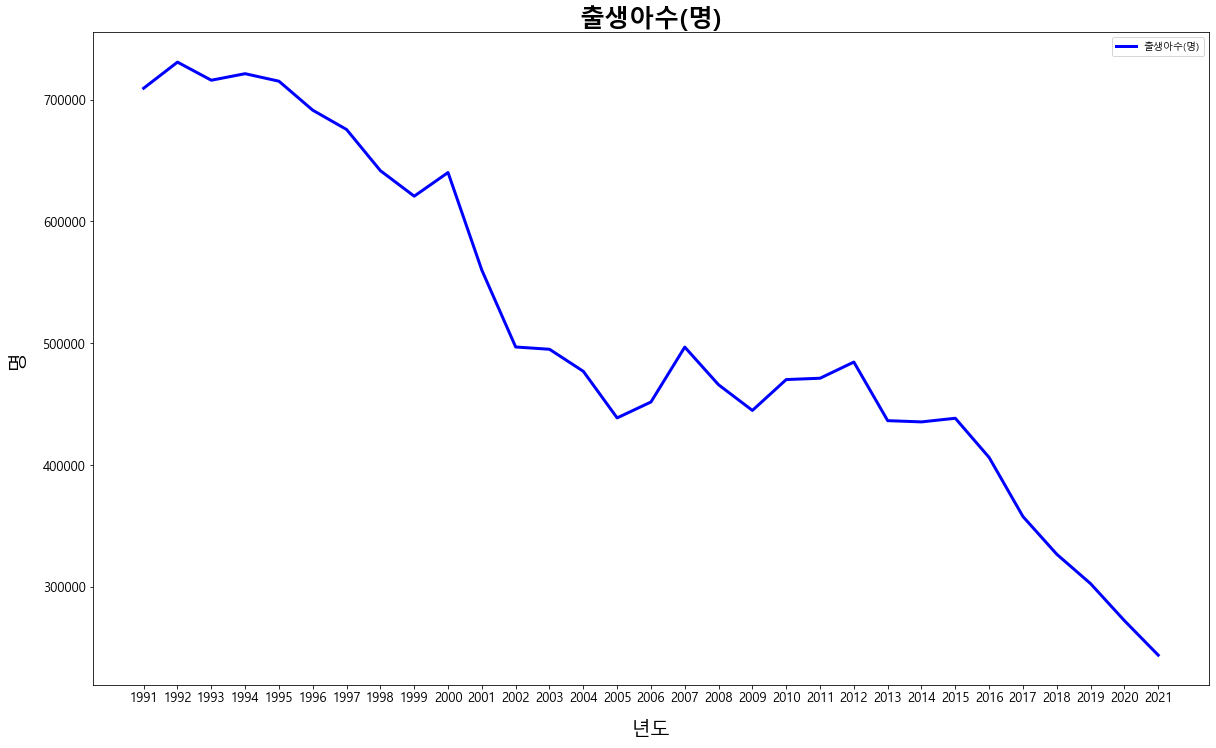

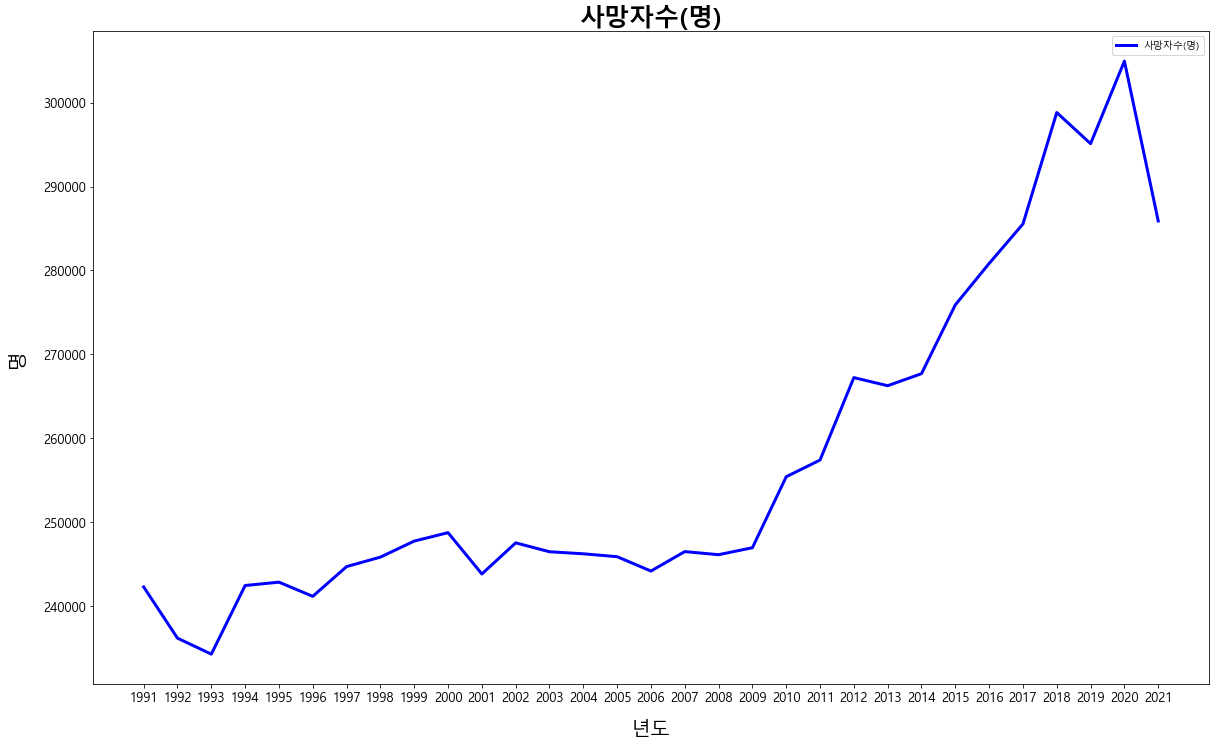

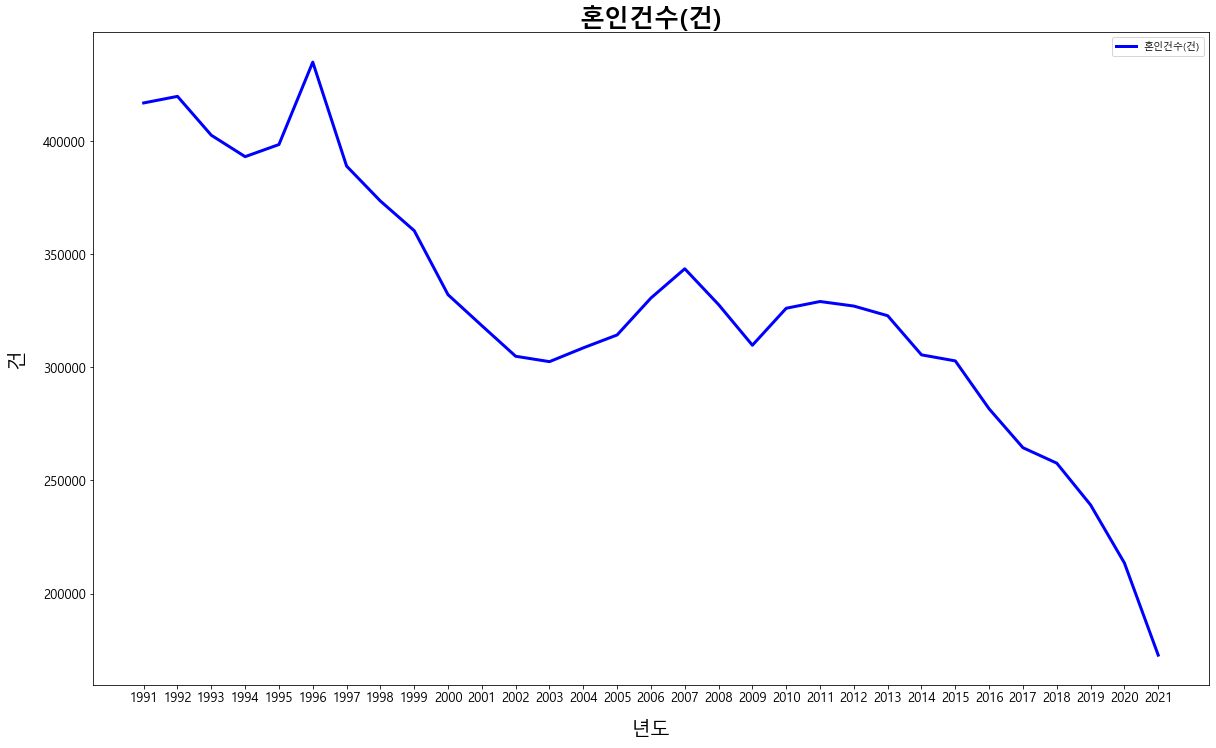

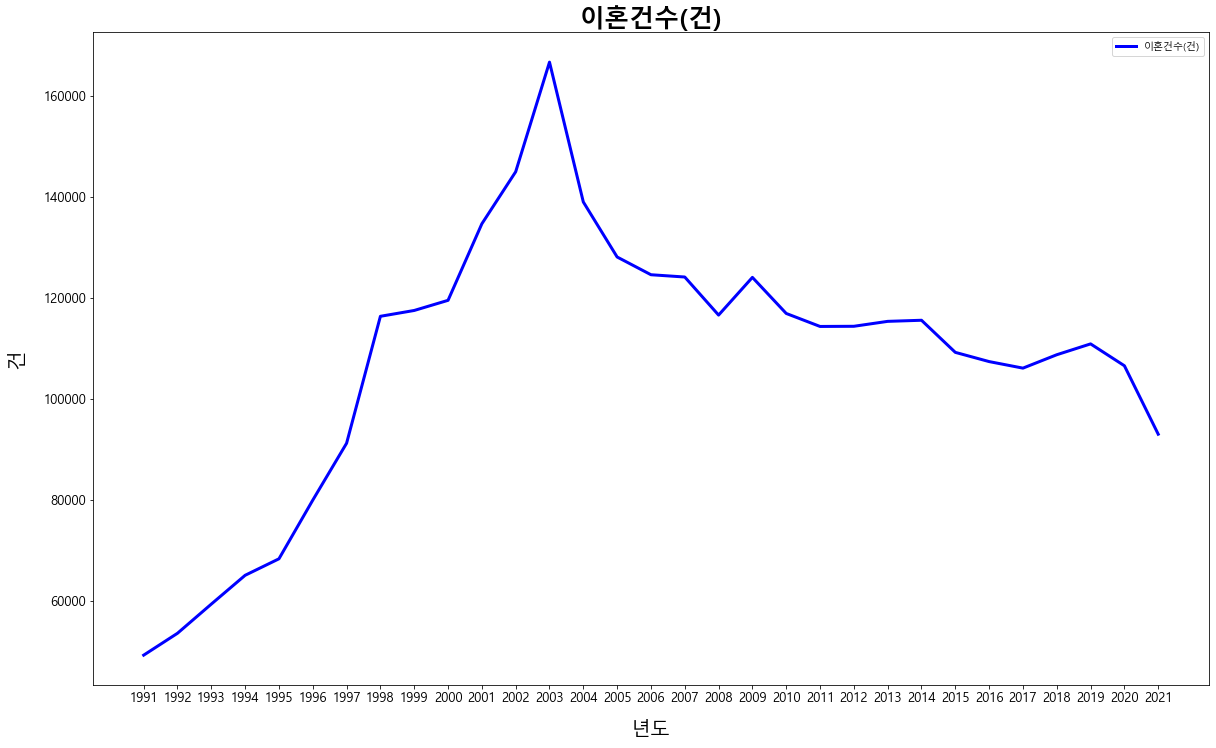

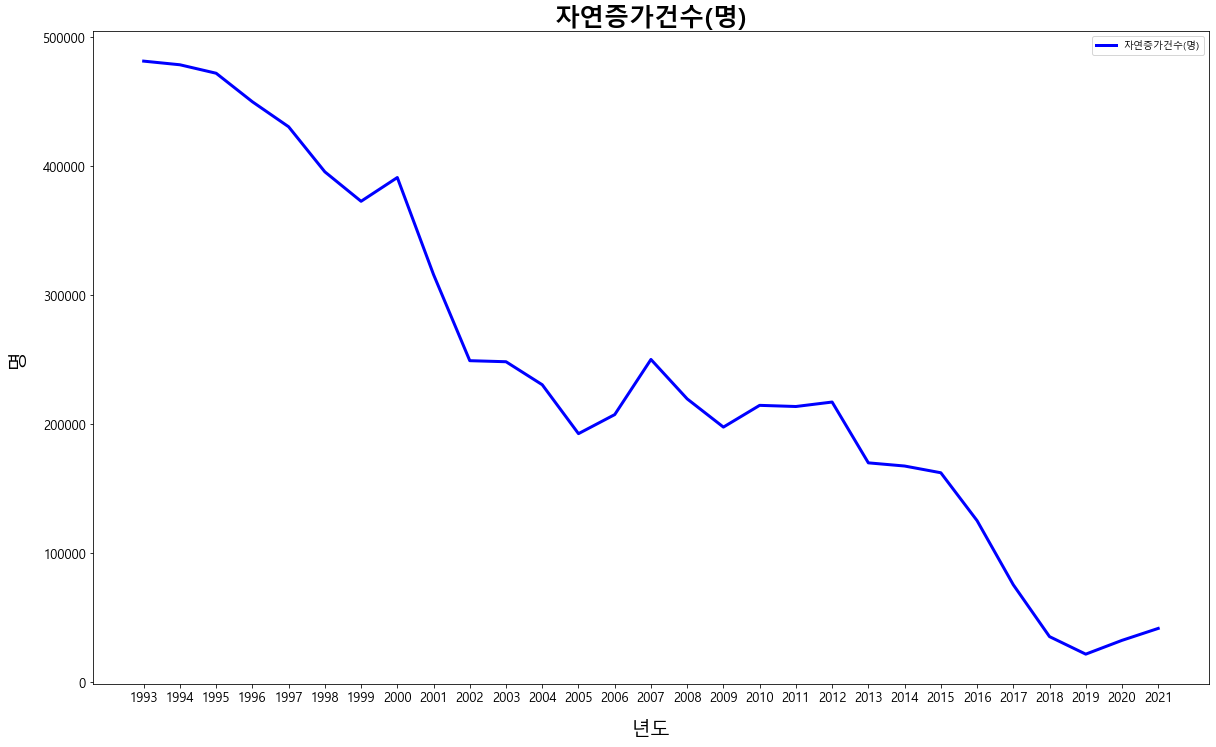

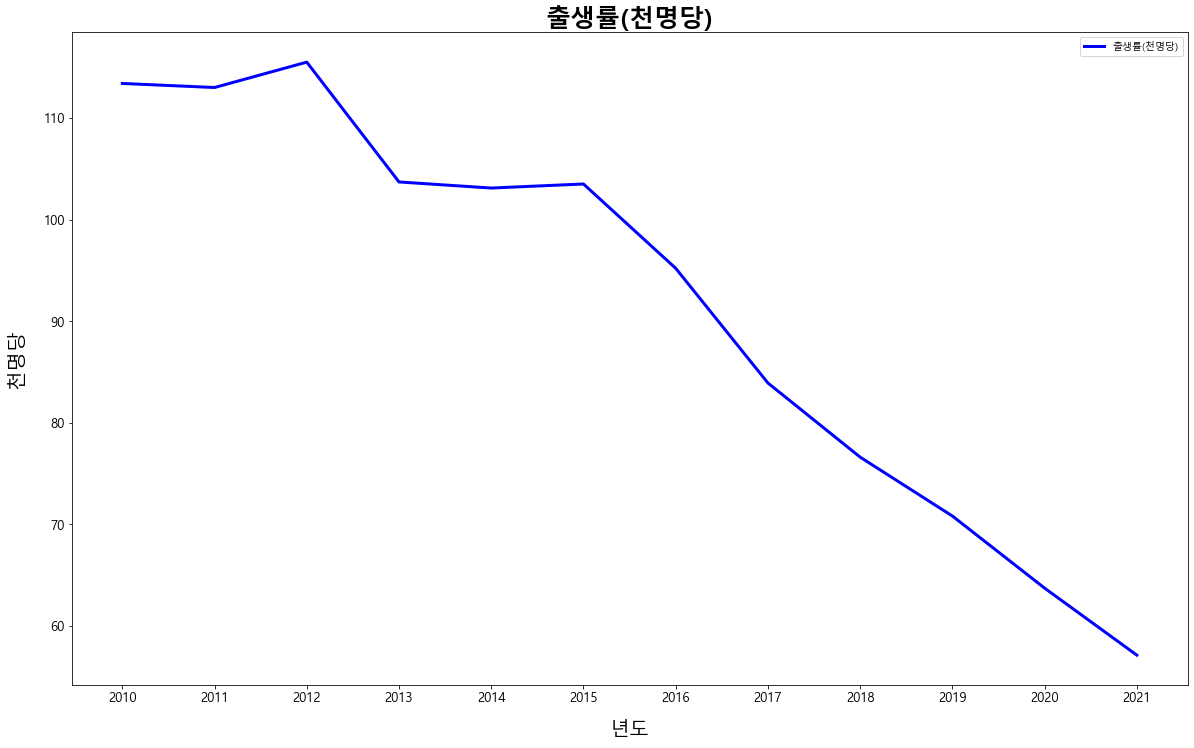

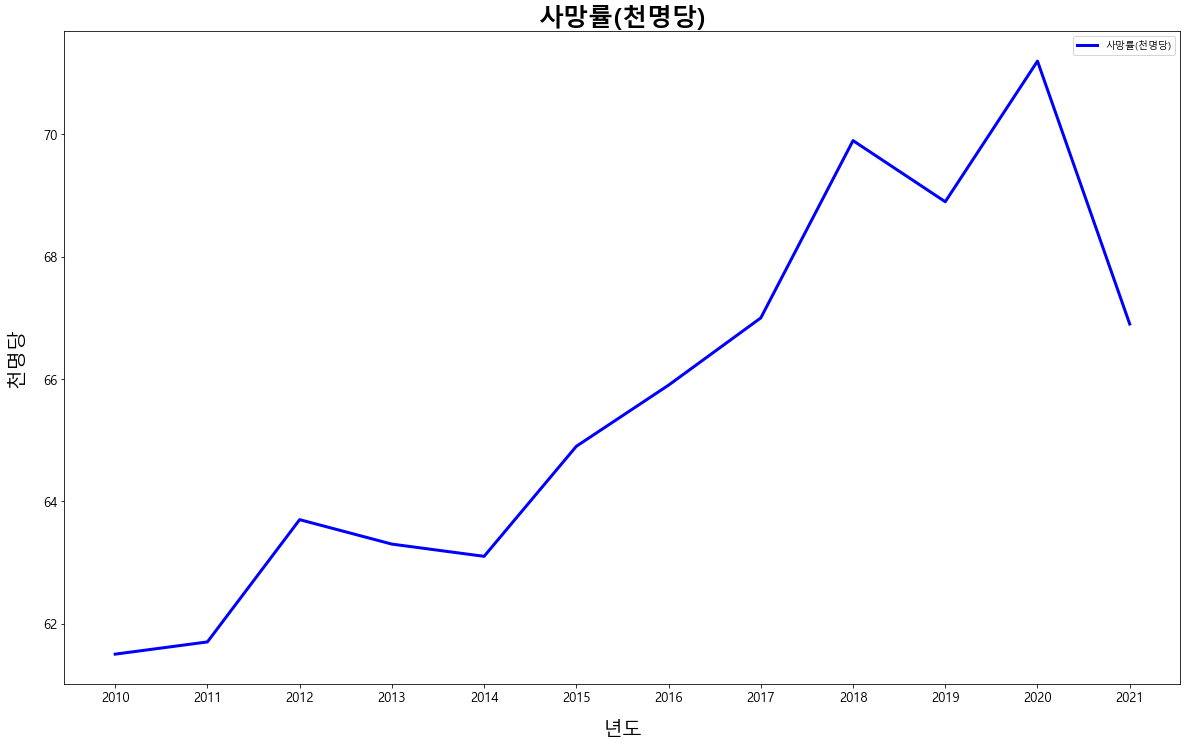

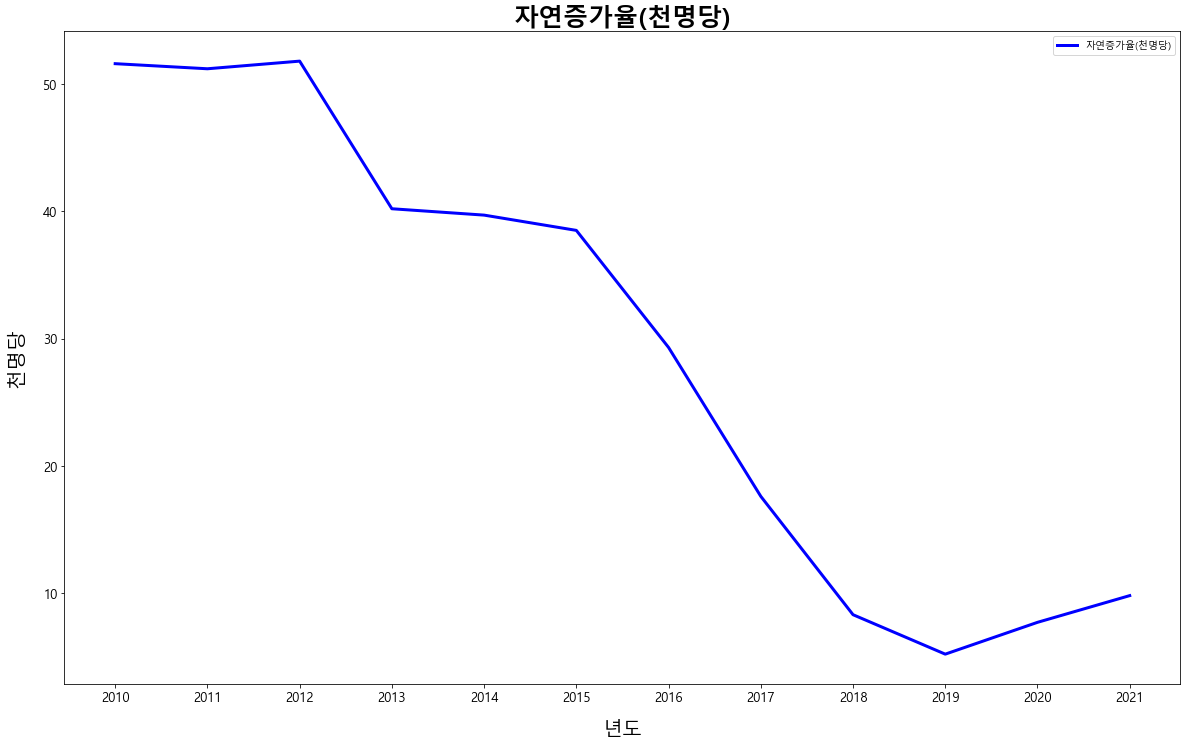

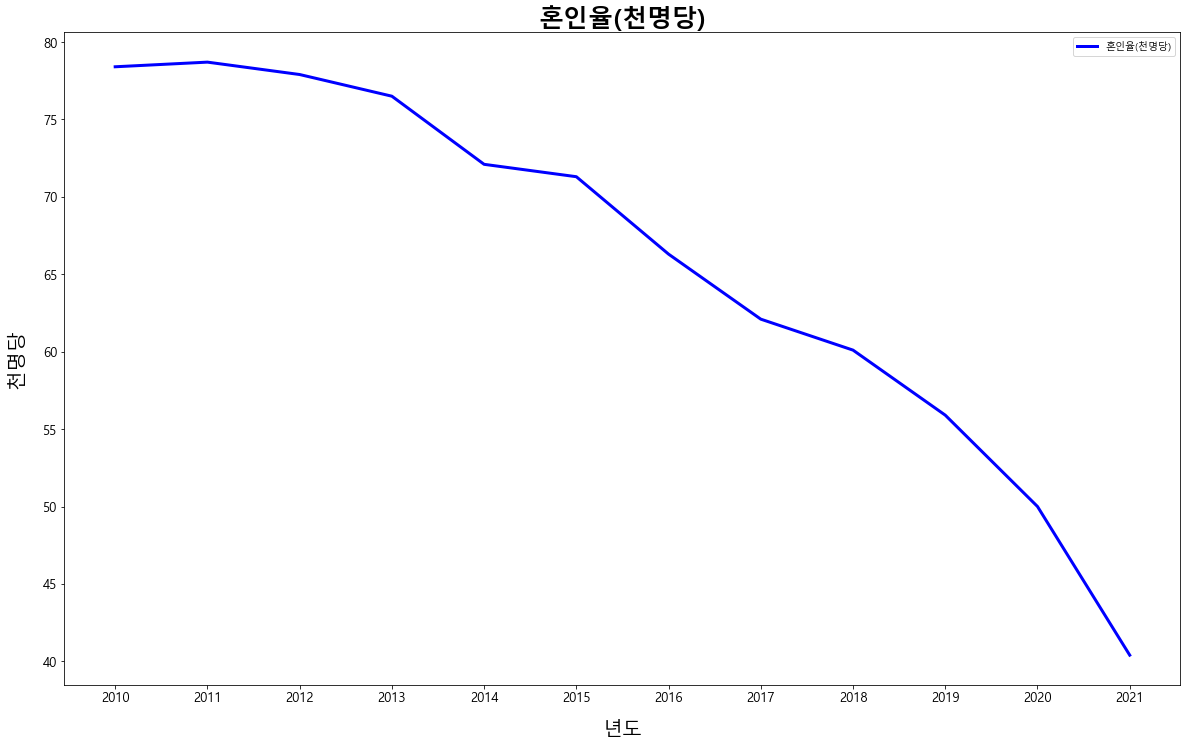

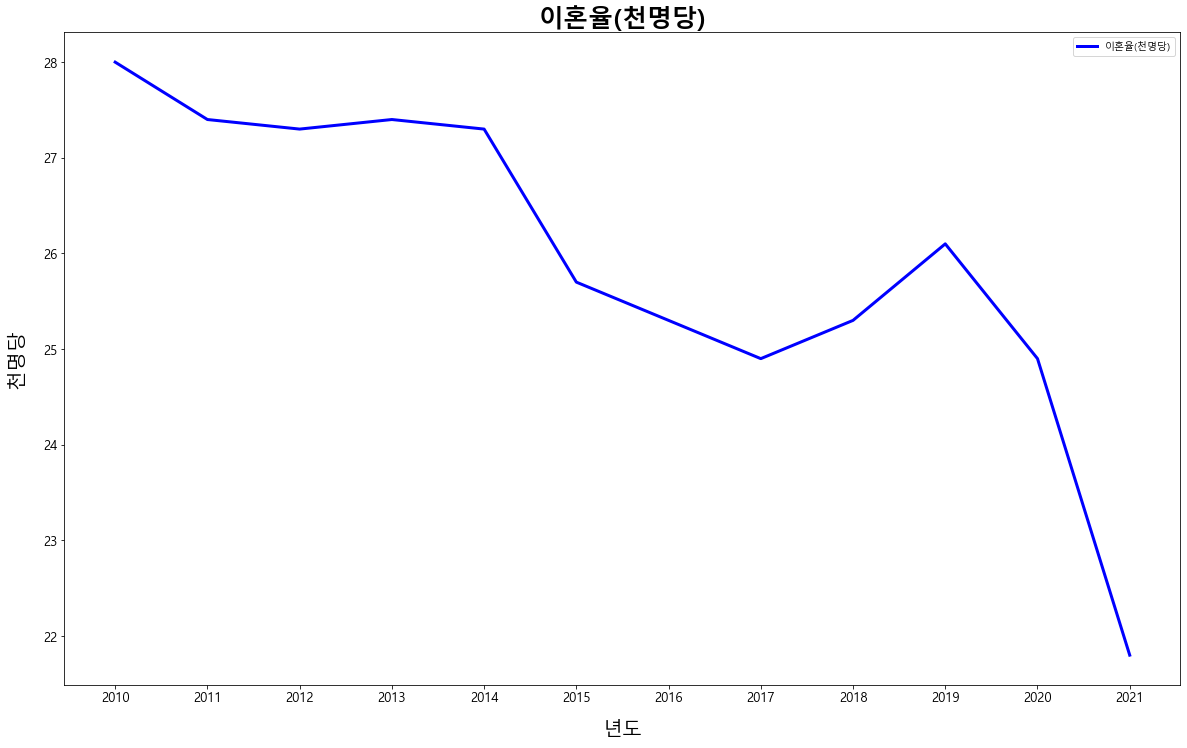

In [10]:
def parse_ylabel_name(category:str):
    parentheses_index_left = category.rfind('(')
    parentheses_index_right = category.rfind(')')
    
    return category[parentheses_index_left+1:parentheses_index_right]

for i in cateogry:
    # preprocessing for drawing
    df_category = this_df.iloc[:,this_df.columns.get_level_values(0)==i].copy()
    df_category.columns = df_category.columns.droplevel(level=0)
    df_category:pd.DataFrame = df_category.T
    
    index_list = list(map(lambda x:x.replace(' ','')[:4],df_category.index.tolist()))
    
    df_category.index = index_list
    df_category.reset_index(0,inplace=True)
    
    df_category[1] = pd.to_numeric(df_category[1])
    df_category = df_category.groupby(by='index').sum().copy()

    # draw plot chart
    plt.figure(figsize=(20,12))
    plt.title(i, fontsize=25,fontweight='bold')
    
    ylabel_name = parse_ylabel_name(i) # get y-label name from category name
    plt.xlabel('년도',fontdict={'fontsize':20},labelpad=15)
    plt.ylabel(ylabel_name,fontdict={'fontsize':20},labelpad=15)
    
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    line = plt.plot(df_category.index.tolist()[10:], df_category[1][10:],label=i,color='r')
    plt.setp(line,color='b',linewidth=3)
    
    plt.legend()
    
    plt.savefig(''.join(['./인구동향/',i,'.png']))
    
    plt.show()
    plt.close()

In [11]:
##### 주요 인구지표 성비 인구성장률 인구구조 부양비 등 #####

df = dfs['주요_인구지표_성비_인구성장률_인구구조_부양비_등.csv'].copy()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 112 entries, 인구구조,부양비별 to 2070
dtypes: float64(110), object(2)
memory usage: 18.5+ KB


In [13]:
df.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
count,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,...,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
mean,3.680834e+06,3.787600e+06,3.894560e+06,3.997761e+06,4.100692e+06,4.205106e+06,4.304451e+06,4.405496e+06,4.506348e+06,4.605857e+06,...,6.014349e+06,5.940856e+06,5.867911e+06,5.795681e+06,5.724259e+06,5.653620e+06,5.583777e+06,5.514773e+06,5.446689e+06,5.379477e+06
std,7.172468e+06,7.377909e+06,7.584241e+06,7.783653e+06,7.981981e+06,8.182861e+06,8.378428e+06,8.577499e+06,8.776745e+06,8.973214e+06,...,1.154886e+07,1.140959e+07,1.127114e+07,1.113375e+07,1.099733e+07,1.086187e+07,1.072730e+07,1.059366e+07,1.046116e+07,1.032981e+07
min,2.900000e+00,2.860000e+00,2.780000e+00,2.620000e+00,2.540000e+00,2.510000e+00,2.340000e+00,2.320000e+00,2.260000e+00,2.180000e+00,...,-1.220000e+00,-1.230000e+00,-1.240000e+00,-1.240000e+00,-1.240000e+00,-1.240000e+00,-1.240000e+00,-1.240000e+00,-1.240000e+00,-1.240000e+00
25%,1.890000e+01,1.870000e+01,1.850000e+01,1.830000e+01,1.830000e+01,1.830000e+01,1.830000e+01,1.830000e+01,1.840000e+01,1.850000e+01,...,5.560000e+01,5.570000e+01,5.580000e+01,5.590000e+01,5.600000e+01,5.610000e+01,5.620000e+01,5.630000e+01,5.630000e+01,5.640000e+01
50%,4.290000e+01,4.330000e+01,4.350000e+01,4.370000e+01,4.380000e+01,4.390000e+01,4.380000e+01,4.360000e+01,4.320000e+01,4.250000e+01,...,6.270000e+01,6.290000e+01,6.310000e+01,6.330000e+01,6.350000e+01,6.350000e+01,6.350000e+01,6.350000e+01,6.340000e+01,6.340000e+01
75%,7.508810e+05,7.827160e+05,8.161680e+05,8.451350e+05,8.810830e+05,9.266340e+05,9.279240e+05,9.329370e+05,9.485430e+05,9.913080e+05,...,3.187975e+06,3.108052e+06,3.036007e+06,2.973310e+06,2.920999e+06,2.879601e+06,2.849110e+06,2.828990e+06,2.818199e+06,2.815279e+06
max,2.576567e+07,2.651303e+07,2.726175e+07,2.798416e+07,2.870467e+07,2.943557e+07,3.013098e+07,3.083830e+07,3.154427e+07,3.224083e+07,...,4.210000e+07,4.158553e+07,4.107491e+07,4.056930e+07,4.006934e+07,3.957486e+07,3.908597e+07,3.860294e+07,3.812635e+07,3.765587e+07


In [14]:
df.head(3)

,"인구구조,부양비별",1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070
0,총인구(명),25012374,25765673.0,26513030.0,27261747.0,27984155.0,28704674.0,29435571.0,30130983.0,30838302.0,...,42099995.0,41585534.0,41074913.0,40569298.0,40069340.0,39574865.0,39085966.0,38602940.0,38126347.0,37655867.0
1,남자(명),12550691,12936583.0,13320983.0,13708120.0,14081950.0,14452831.0,14829861.0,15205393.0,15576098.0,...,20920520.0,20673019.0,20427643.0,20184891.0,19944832.0,19707593.0,19473353.0,19242034.0,19013814.0,18788054.0
2,여자(명),12461683,12829090.0,13192047.0,13553627.0,13902205.0,14251843.0,14605710.0,14925590.0,15262204.0,...,21179475.0,20912515.0,20647270.0,20384407.0,20124508.0,19867272.0,19612613.0,19360906.0,19112533.0,18867813.0


In [15]:
print('check null : {}'.format(df.isnull().values.any()))
print('chekc Nan : {}'.format(df.isna().values.any()))

check null : False
chekc Nan : False


In [16]:
# data preprocessing
this_df = df.copy().applymap(lambda x:x.replace('-','0') if isinstance(x,str) else x)
this_df['1960'] = pd.to_numeric(this_df['1960'].copy())

category = this_df['인구구조,부양비별'].copy().tolist()
this_df.set_index('인구구조,부양비별',inplace=True)

this_columns:np.ndarray = this_df.columns.copy().to_numpy().astype(int)
range_cond = np.logical_and(this_columns >= 1995, this_columns <= 2035) # set year range
years = this_columns[range_cond].astype(str) # years for x-axis

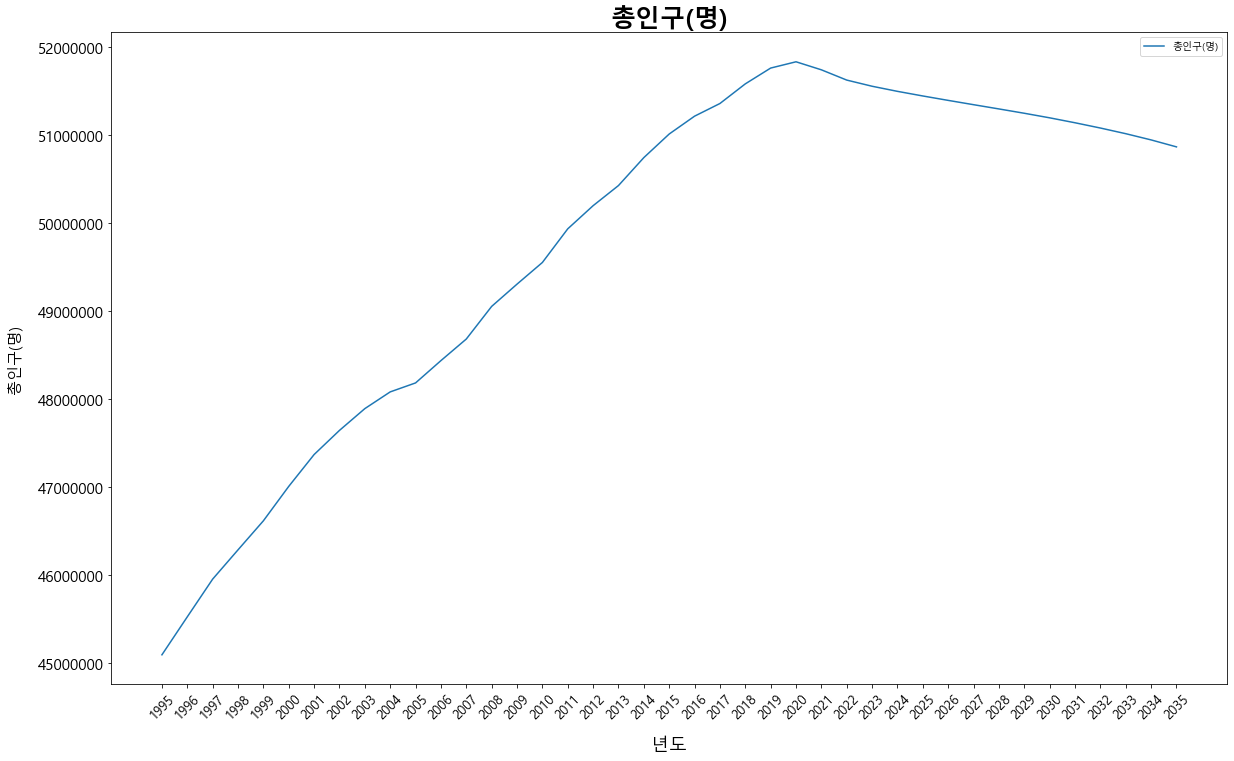

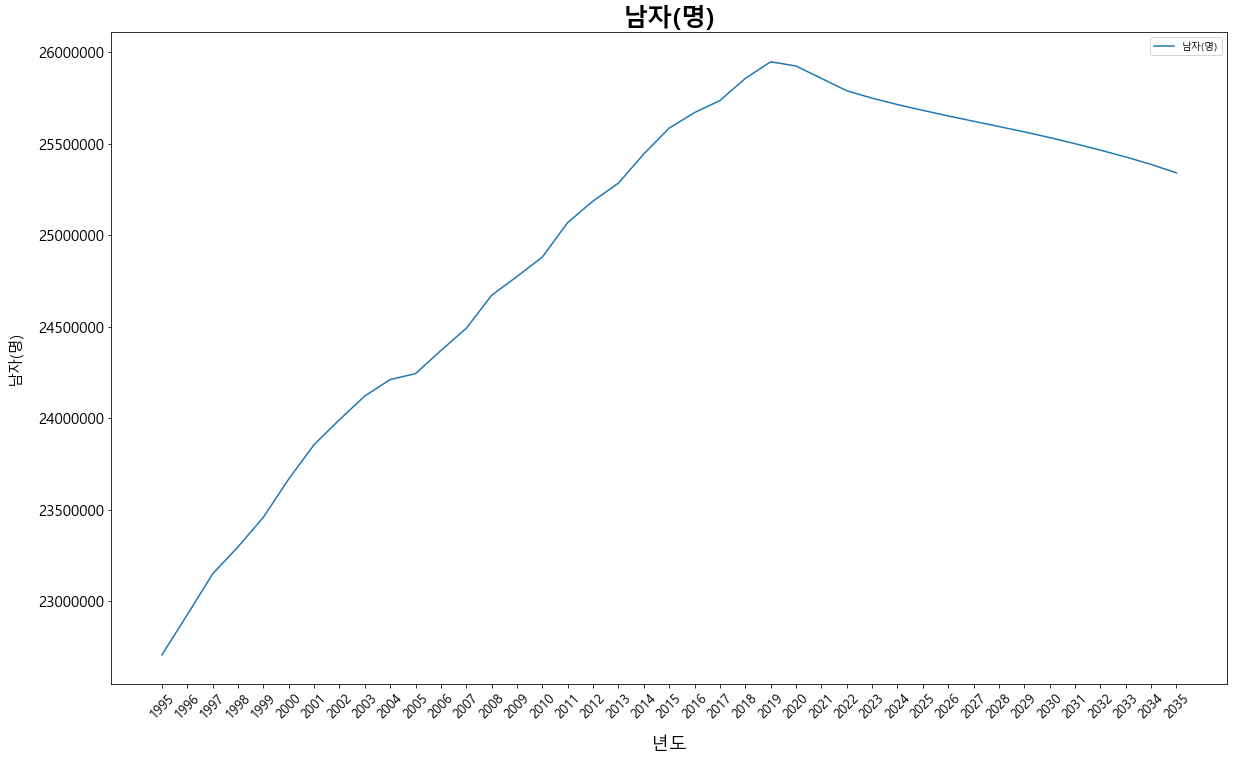

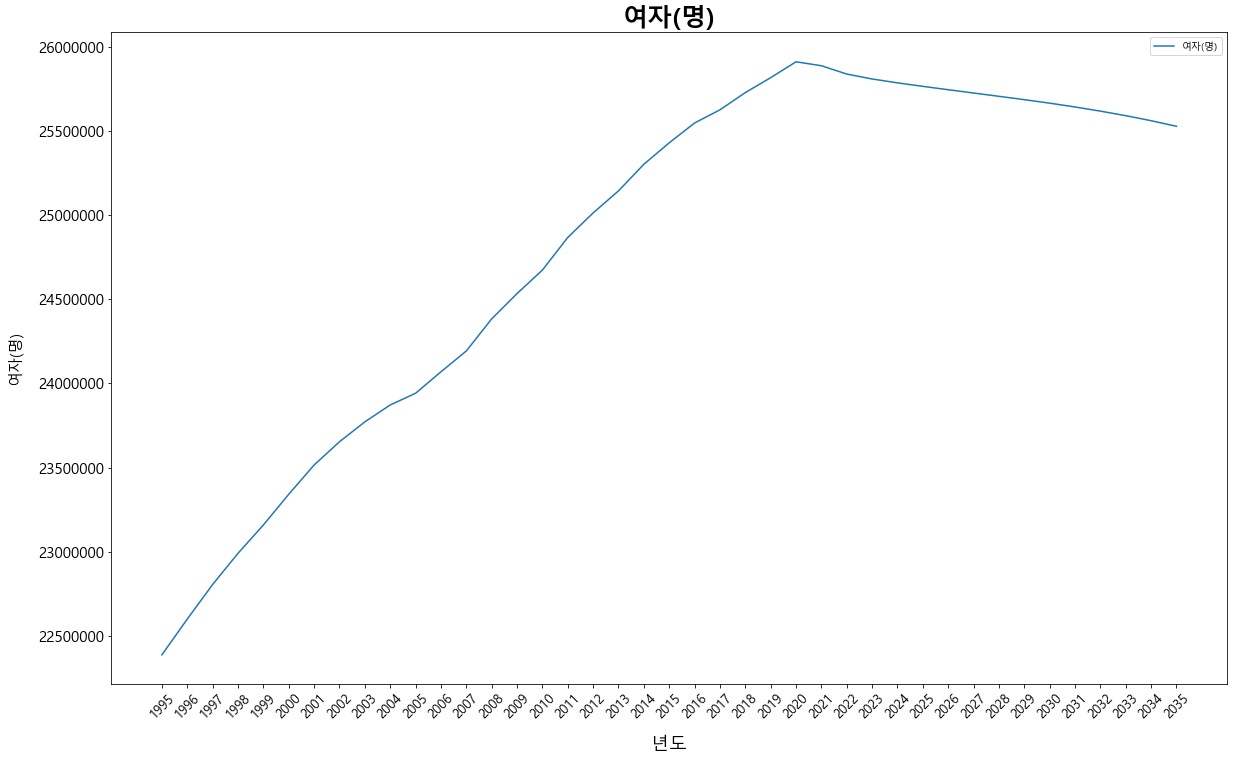

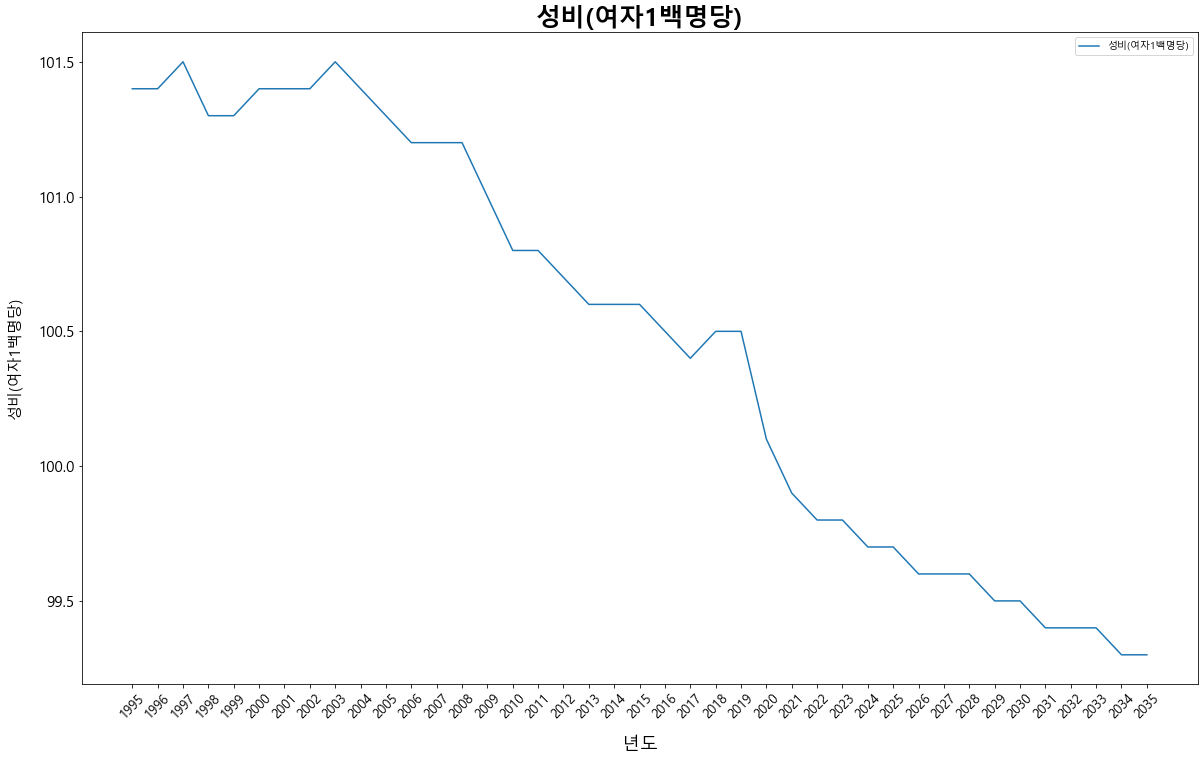

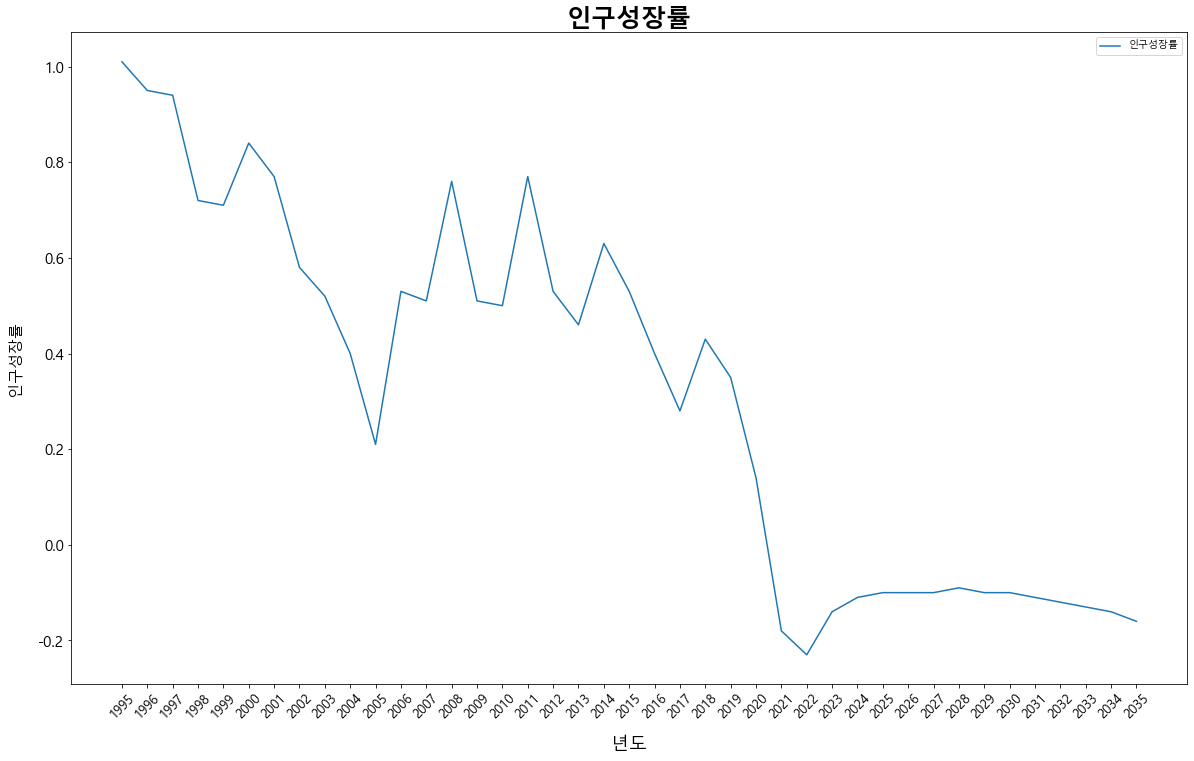

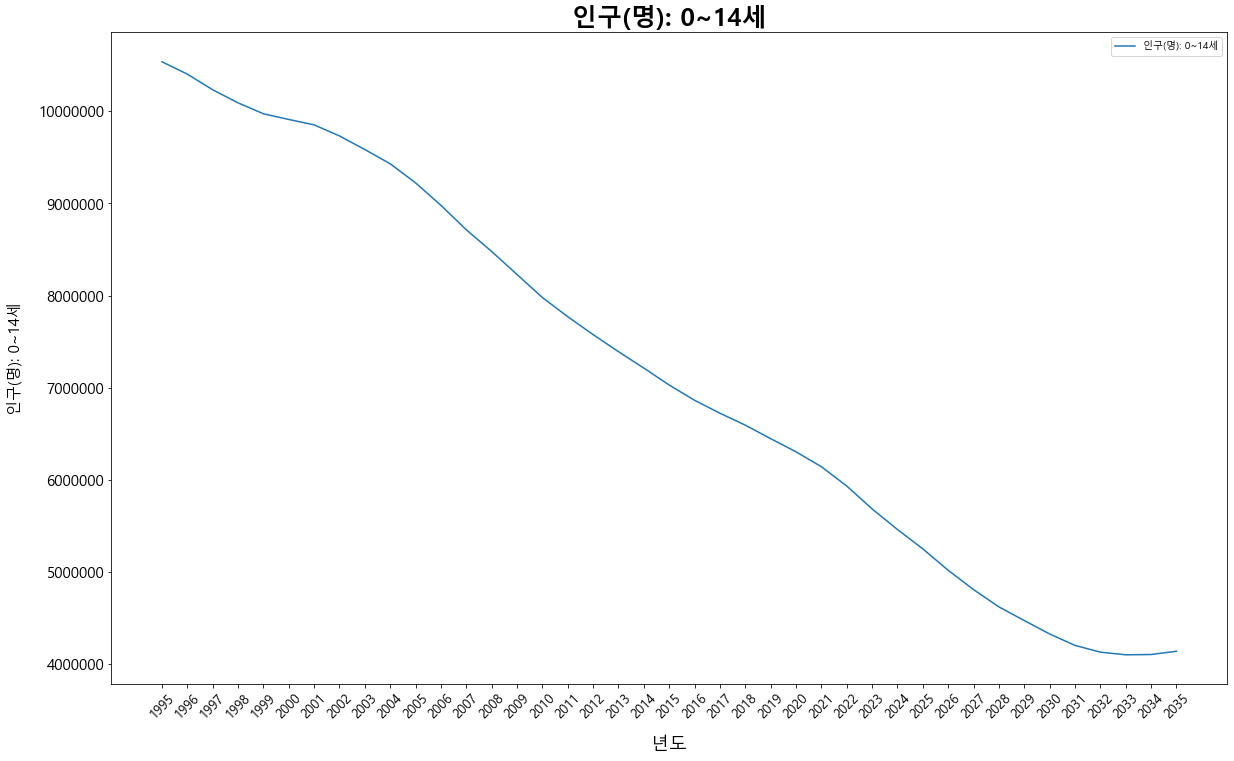

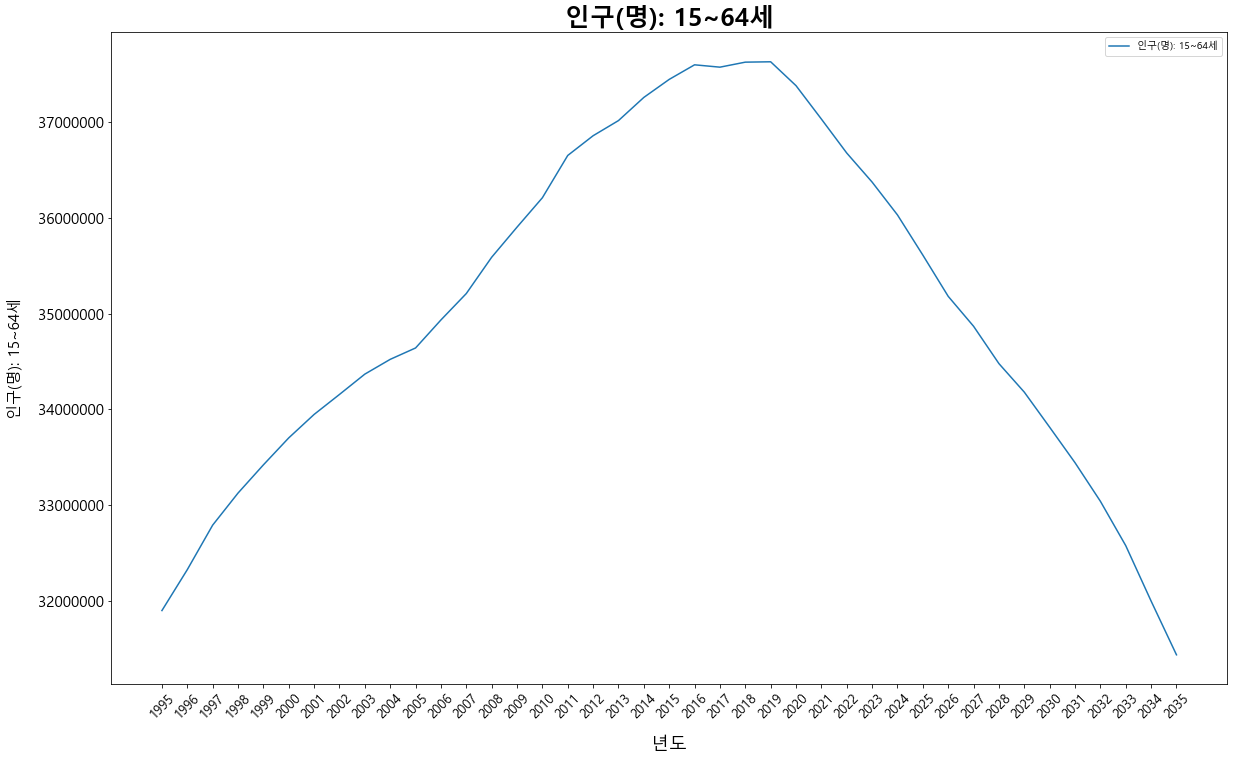

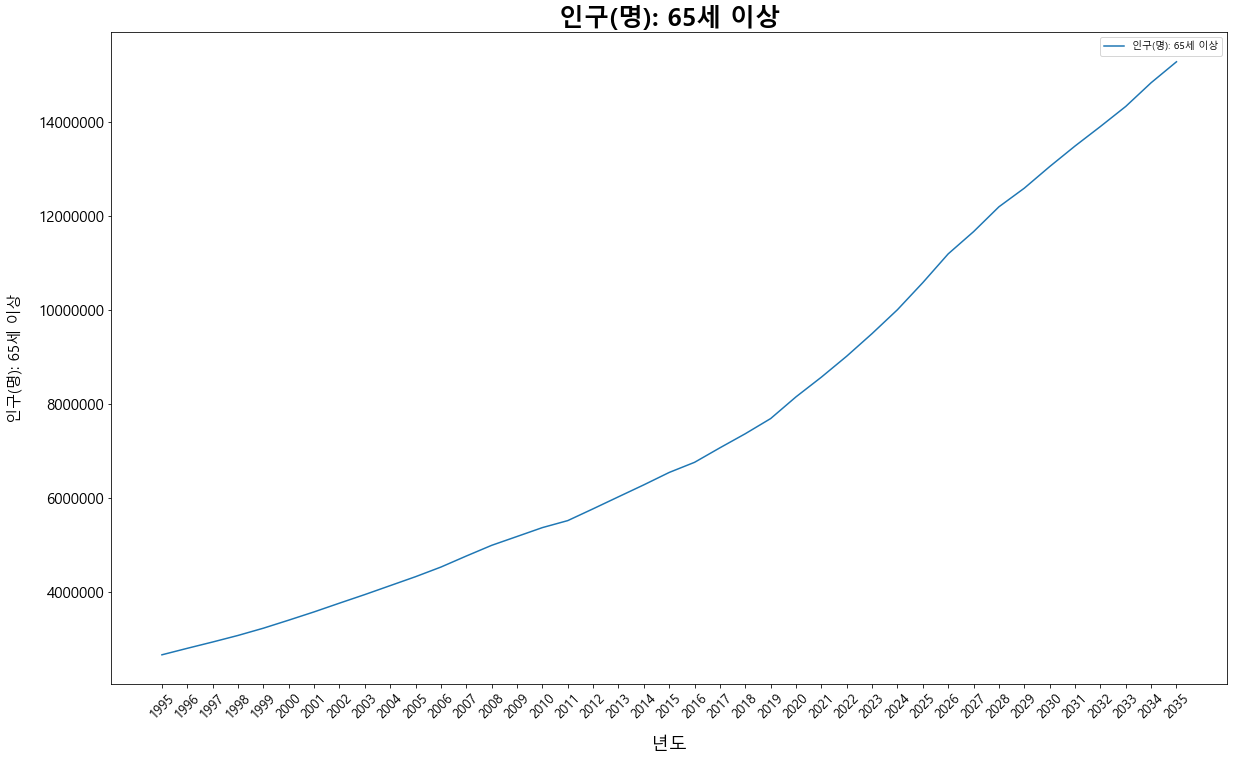

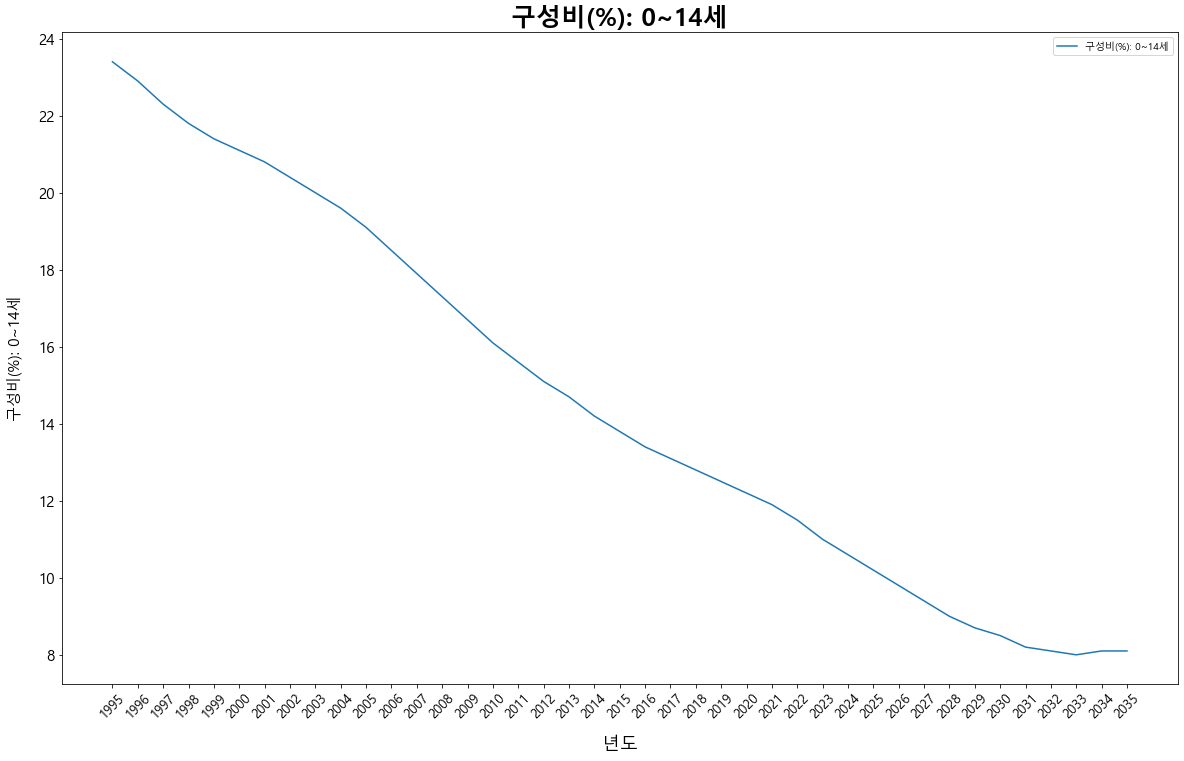

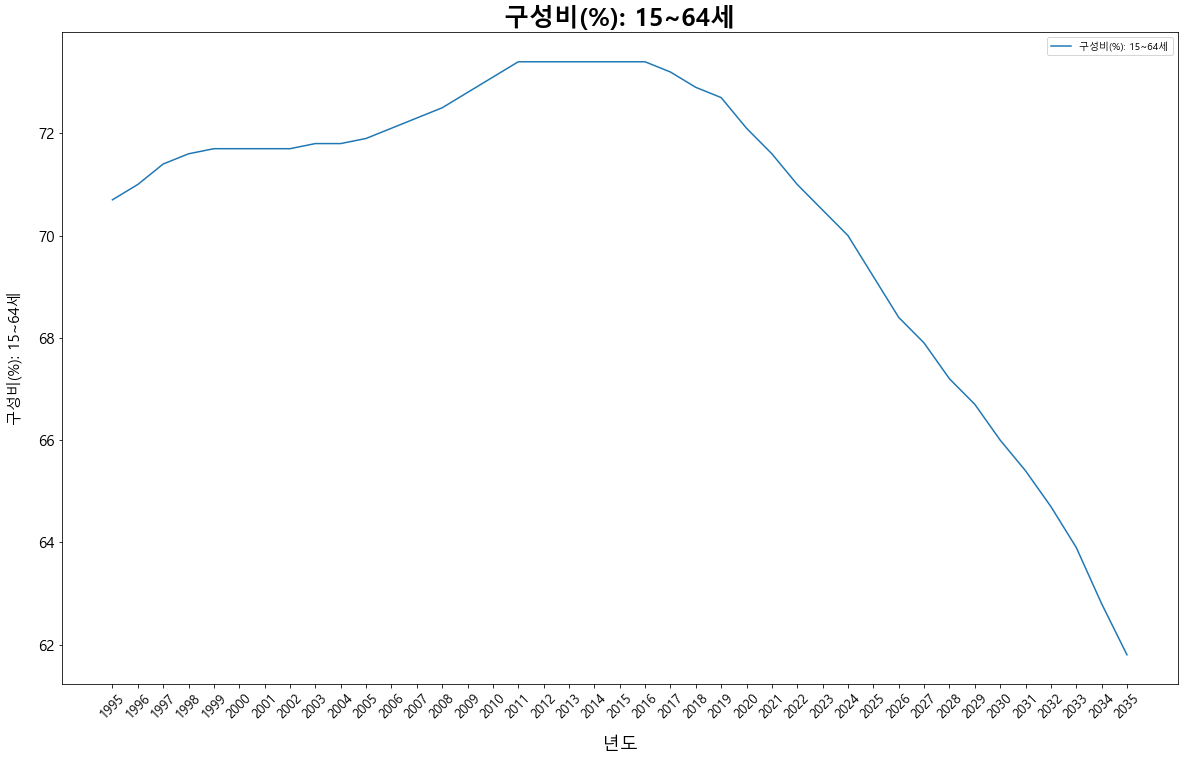

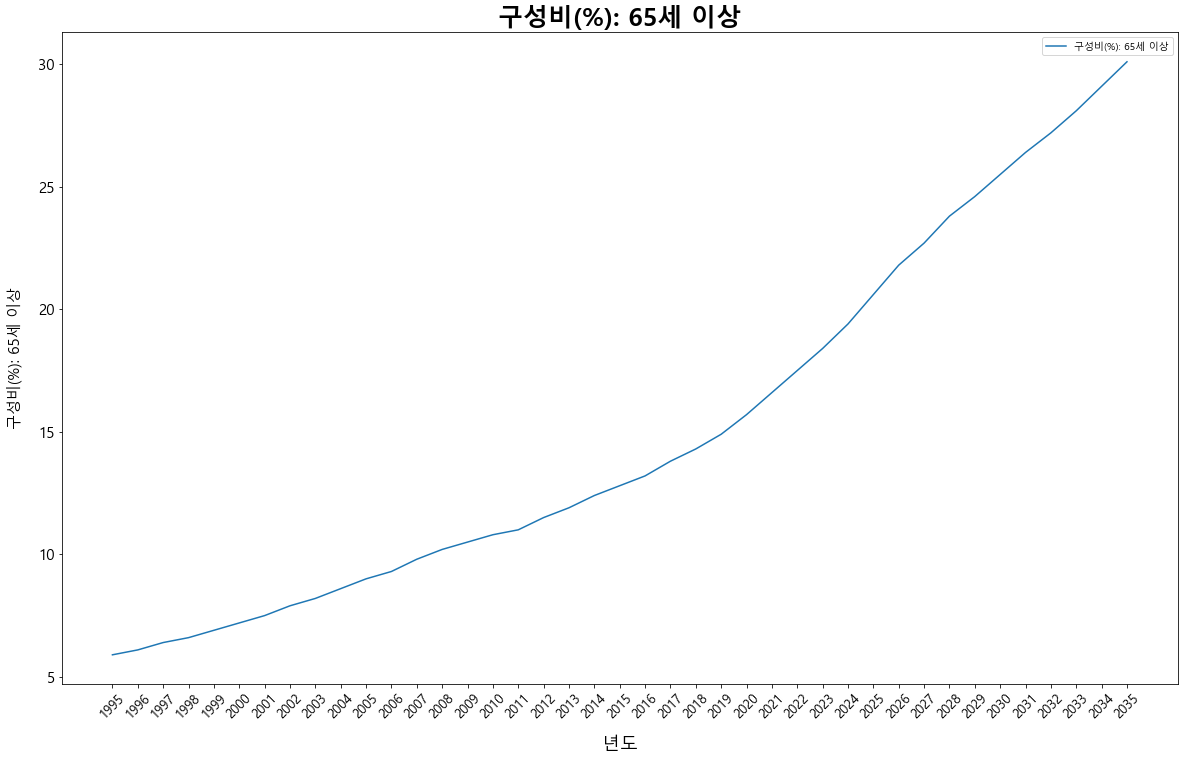

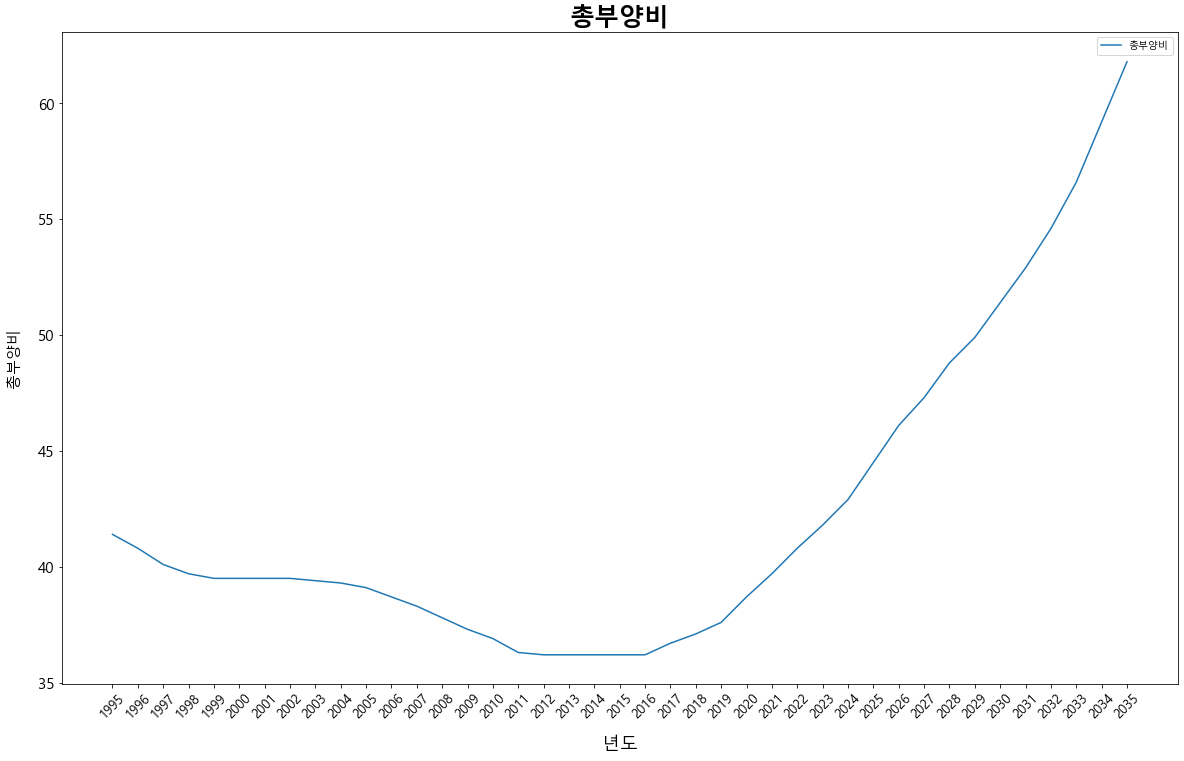

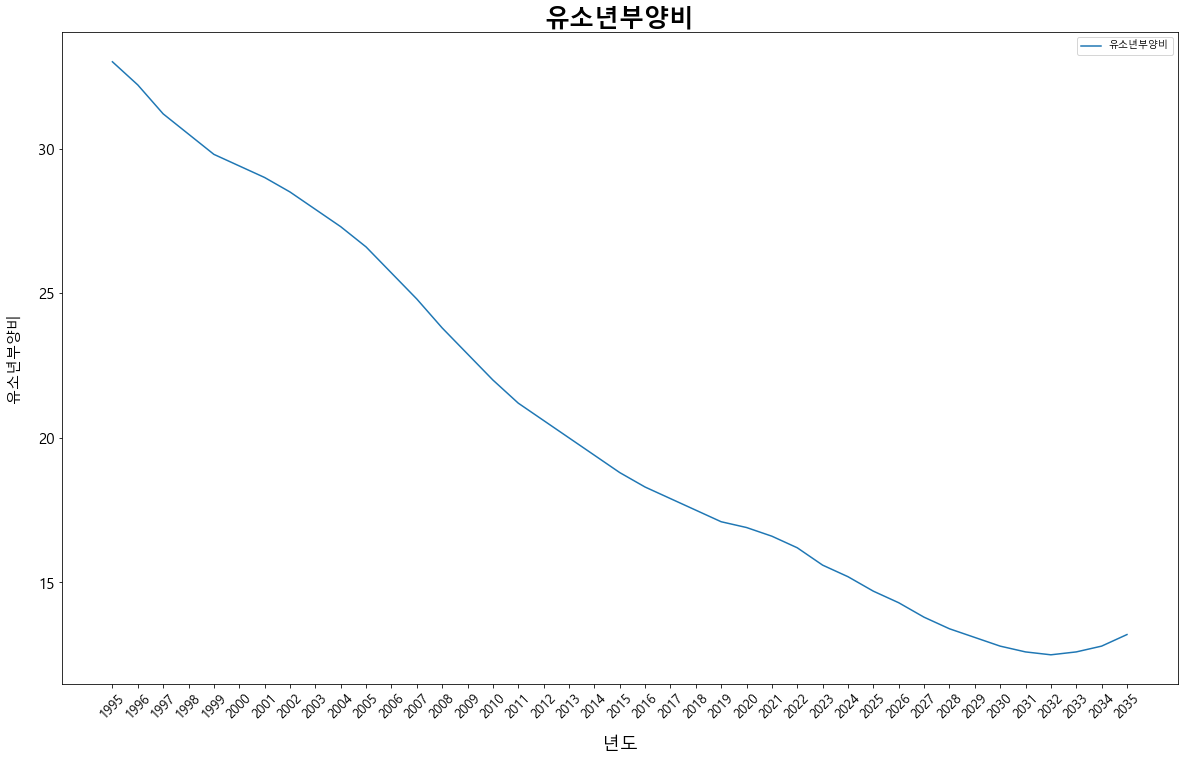

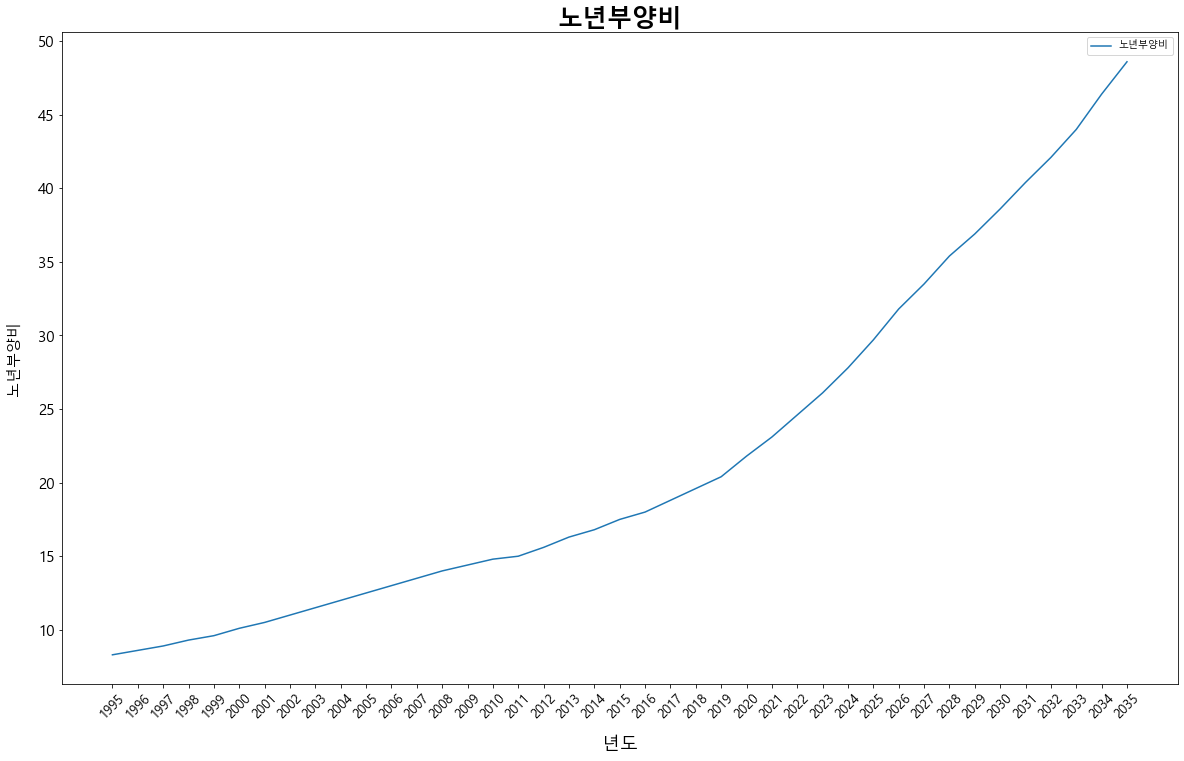

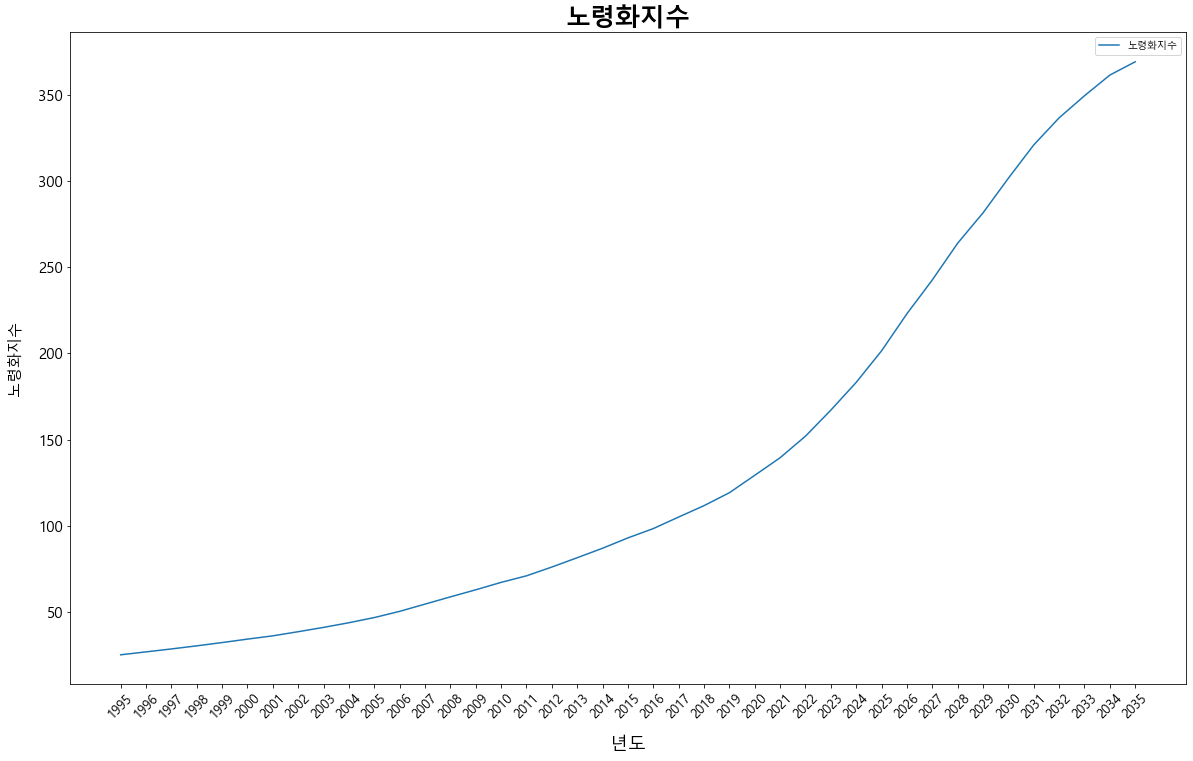

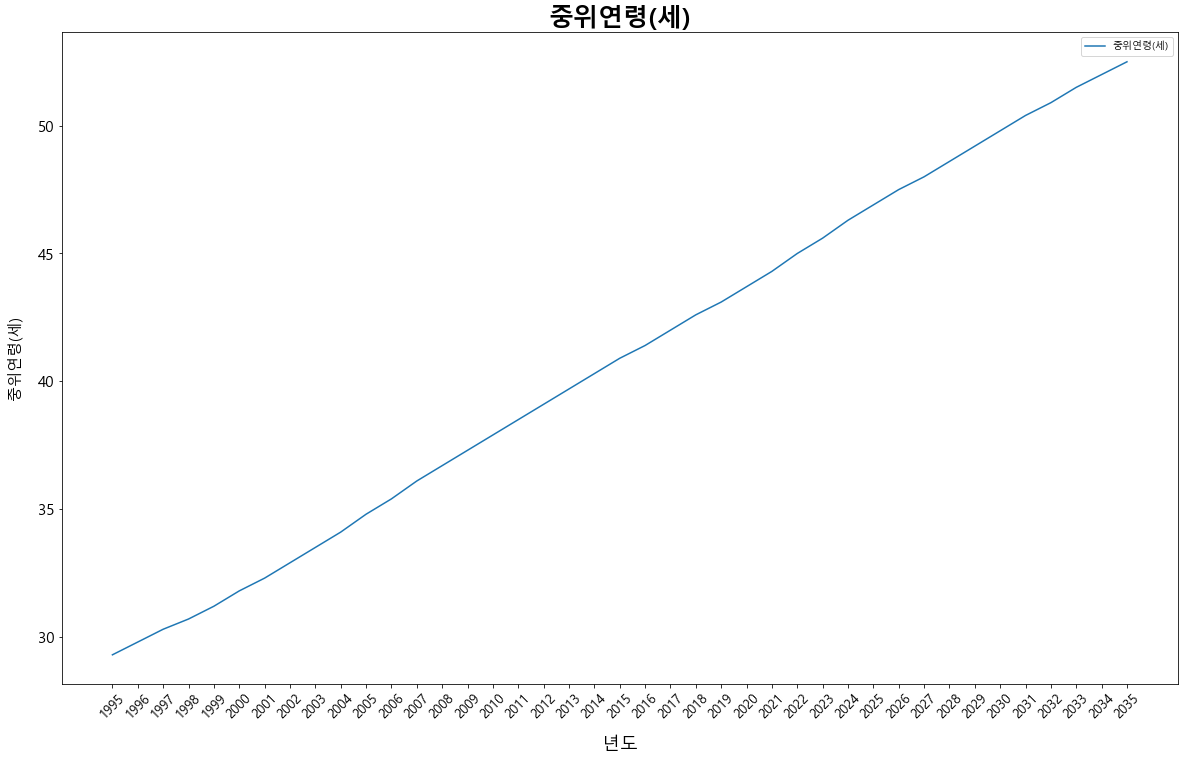

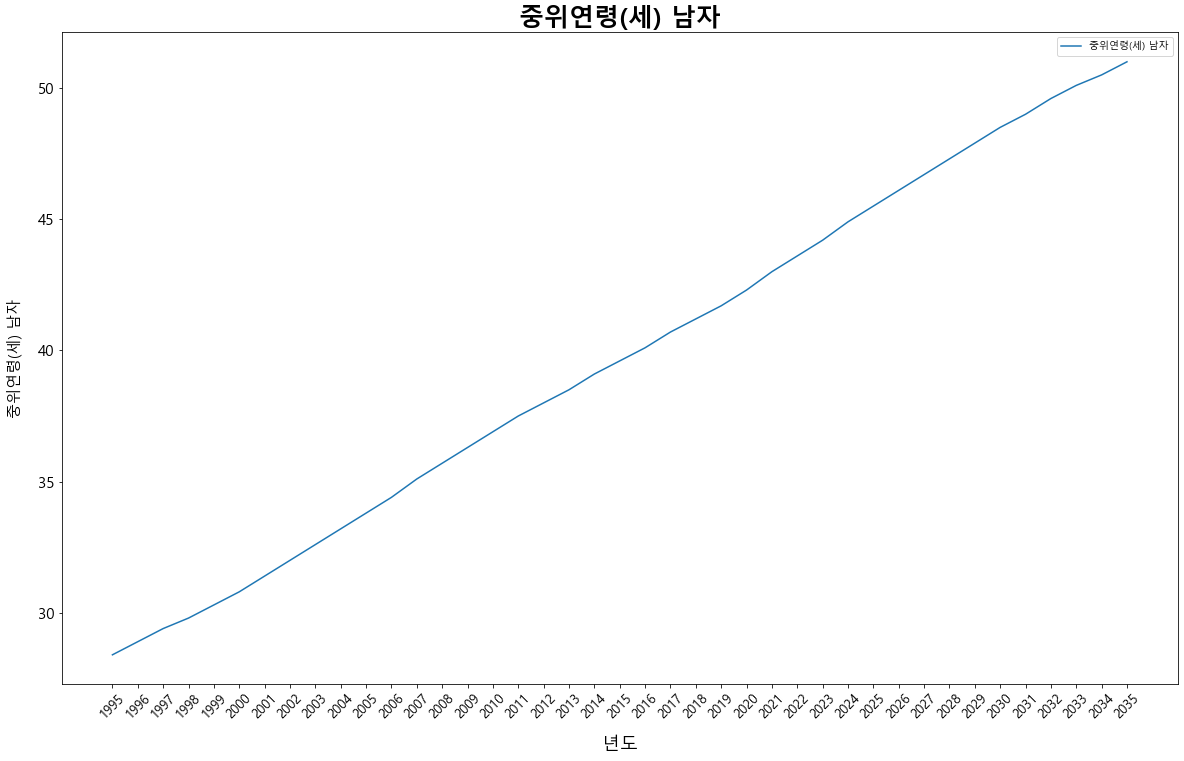

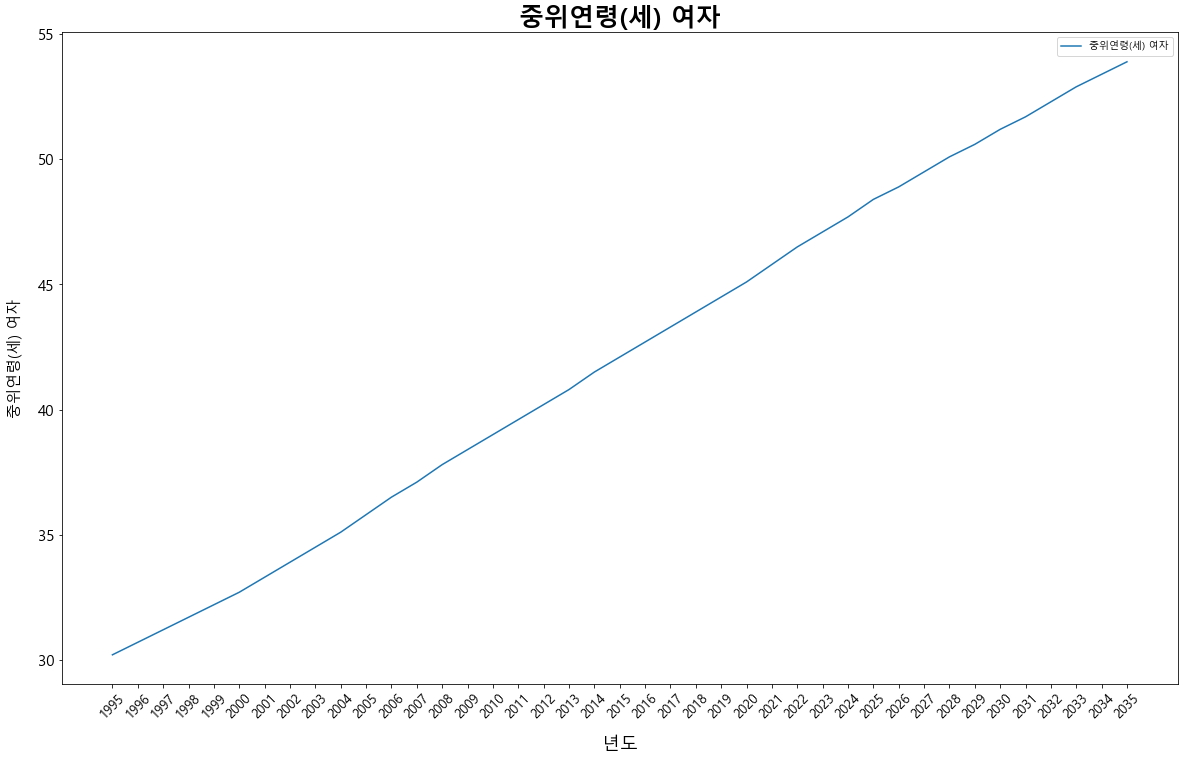

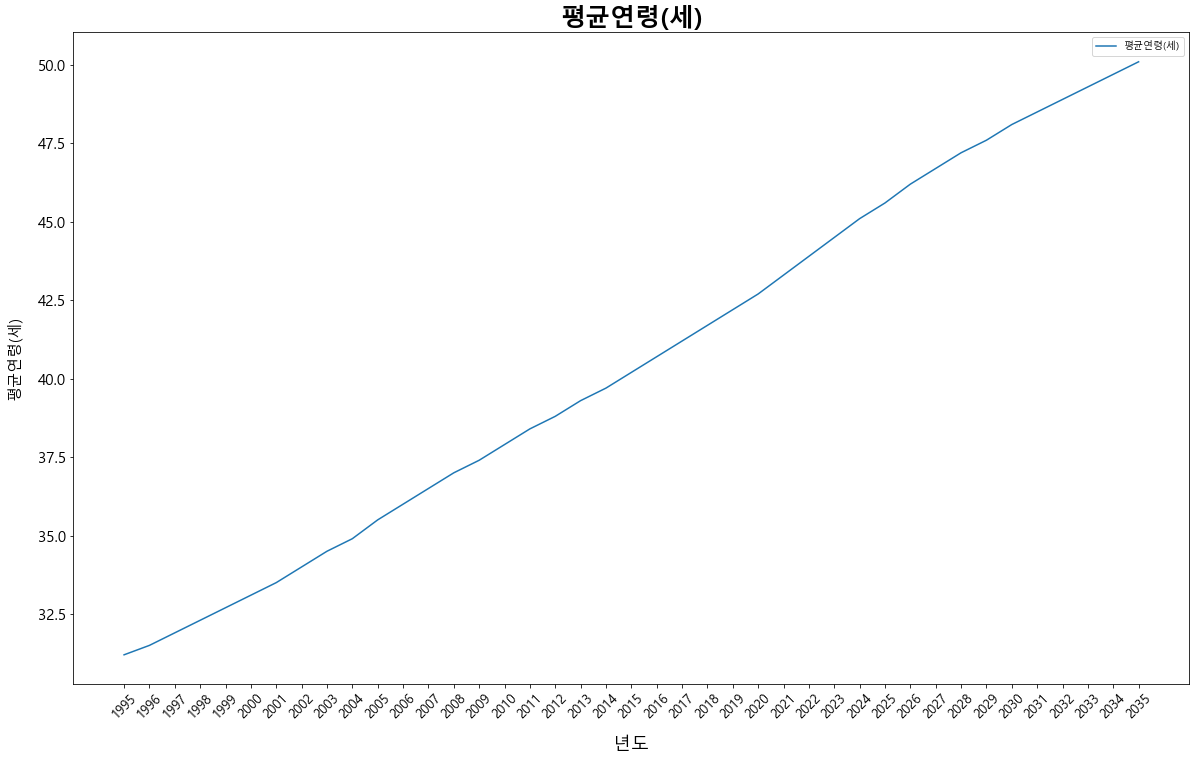

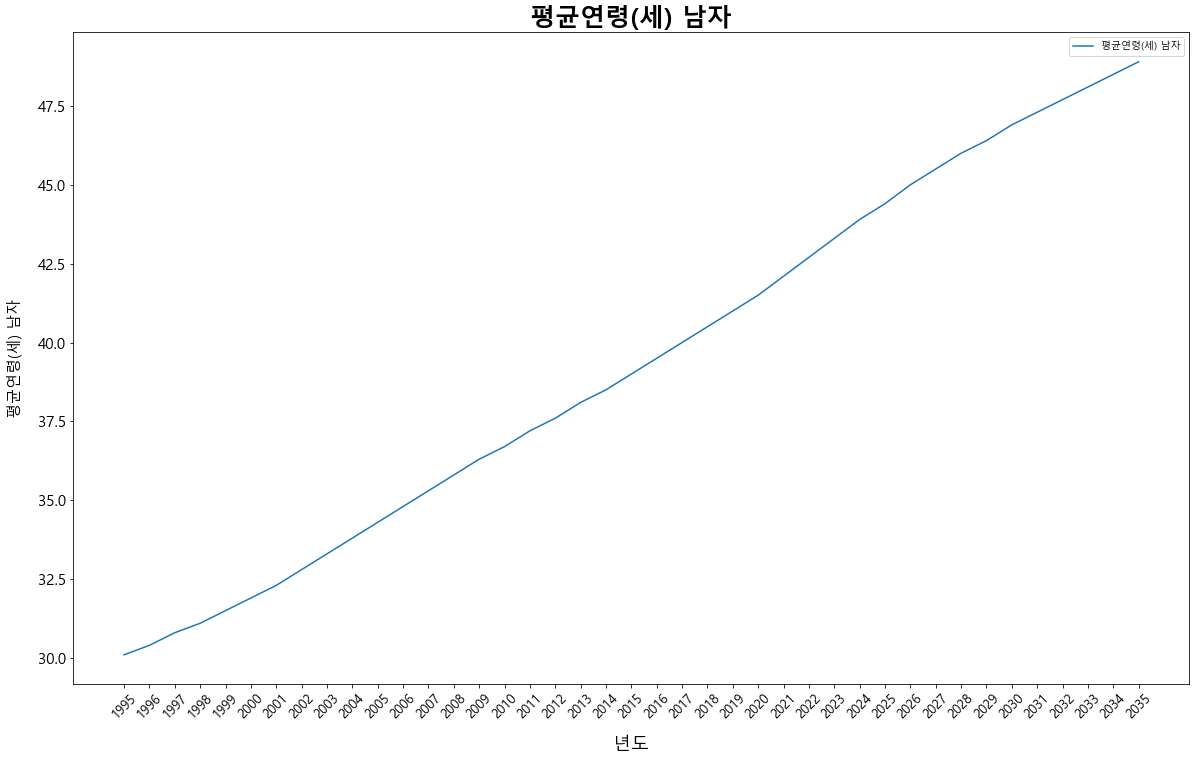

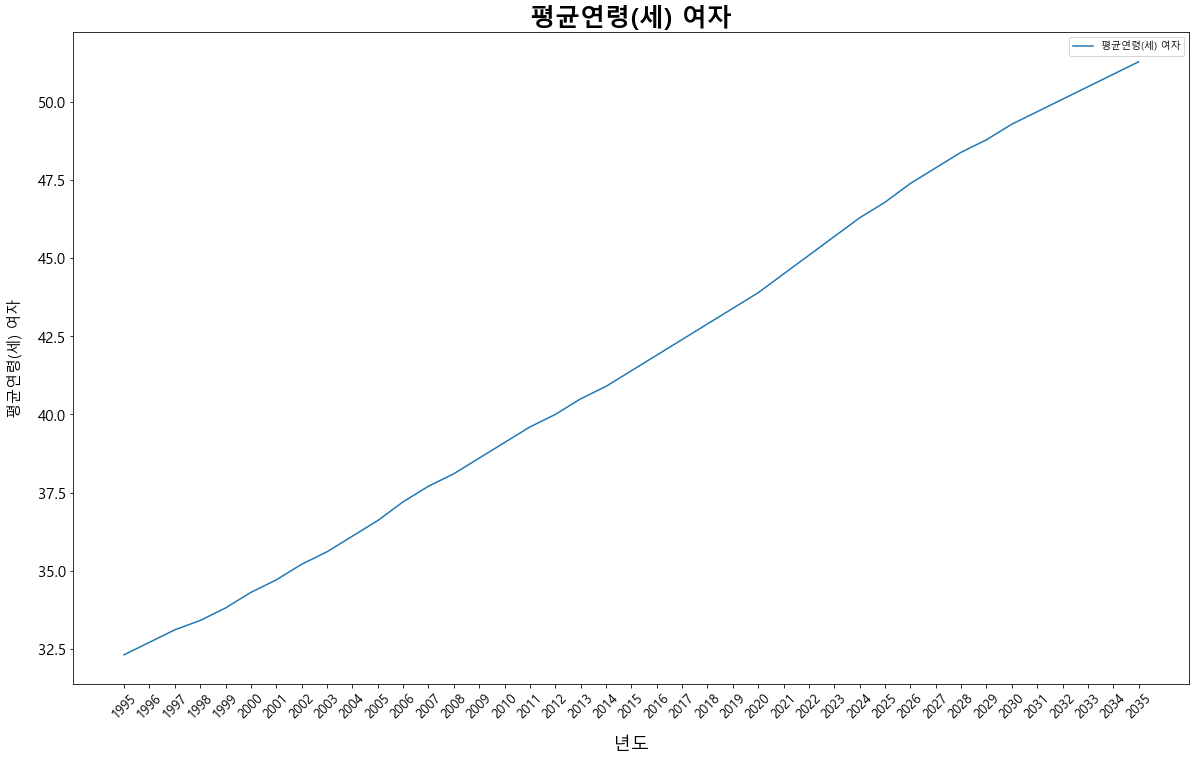

In [17]:
for i in category:
    df_category = this_df.loc[i,years].copy()
    population = df_category
    
    # draw bar chart
    plt.figure(figsize=(20,12))
    plt.title(label=i,fontdict={'fontsize':25,'fontweight':'bold'})
    
    plt.ylabel(i,labelpad=15,fontdict={'fontsize':15})
    plt.xlabel('년도',labelpad=15,fontdict={'fontsize':18})
    
    plt.xticks(fontsize=13,rotation=45)
    plt.yticks(fontsize=15)
    plt.ticklabel_format(style="sci", axis="y", scilimits=(0, 100))
    
    plt.plot(years,population,label=i)
    plt.legend()
    plt.savefig(''.join(['./인구지표/',i,'.png']))
    plt.show()
    plt.close()
    

# 출처

- https://www.data.go.kr/data/15013104/standard.do 전국문화축제표준데이터
- https://www.data.go.kr/data/15013106/standard.do 전국공연행사정보표준데이터
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL21161&conn_path=I2 1인가구비율(시도군구)
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1YL12701&vw_cd=MT_GTITLE01&list_id=102&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_GTITLE01 독거노인가구비율(시도군구)
- https://www.price.go.kr/tprice/portal/pricetrend/personalservicetrend/getPersonalTFeeList.do# 개인서비스_기간별동향
- https://www.price.go.kr/tprice/portal/pricetrend/publicutilitypircetrend/getPublicTrend.do 공공요금_기간별동향
- https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=f86b7896-4185-43c8-8e2b-d19ad2081910 문화빅데이터포털
- https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=21566e2b-d9ec-44c6-9843-1dd52e4bd946 문하빅데이터포털 전체상품
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1J20001&vw_cd=MT_ZTITLE&list_id=P2_6&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE 지출목적별_소비자물가지수
- https://kosis.kr/statHtml/statHtml.do?orgId=117&tblId=DT_117071_019&vw_cd=&list_id=&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=E1&docId=0339615225&markType=S&itmNm=%EC%A0%84%EA%B5%AD 노인_우울증상
https://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01&outLink=Y&parentId=J1.1;J1_8.2;#content-group 스트레스_정도_전반적인_생활
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1BPA002&vw_cd=&list_id=&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=E1&docId=0250157849&markType=S&itmNm=%EC%A0%84%EA%B5%AD 주요인구지표_성비_인구성장률
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B8000G&vw_cd=&list_id=&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=E1&docId=0328037311&markType=S&itmNm=%EC%A0%84%EA%B5%AD 월분기_연간_인구동향_출생_사망률
- https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B34E01&vw_cd=&list_id=&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=E1&docId=0022239069&markType=S&itmNm=%EC%A0%84%EA%B5%AD 사망원인(자살)
- https://www.nars.go.kr/report/view.do?cmsCode=CM0018&brdSeq=36212 국회입법조사처(파일X)
- http://ecos.bok.or.kr/flex/EasySearch.jsp?langGubun=K&topCode=013Y202 생산자 물가지수